# Lesson 7 - Parkinson PCR

## Author - Connor Higgins

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

#### 1. Loading Dataset

In [1]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import scipy.stats as ss

In [3]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


#### 2. Create the X-matrix (one-hot encoding categorical factors).

In [4]:
# Defining the target
target_label = 'total_UPDRS'

# Dropping non-features
parkinsons_df = parkinsons_df.drop(['test_time', 'motor_UPDRS'], axis=1)

# Preparing categorical features
categorical_features = ['sex', 'age', 'subject#'] 
parkinsons_df[categorical_features] = parkinsons_df[categorical_features].astype(str)

# One-hot encoding columns
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Defining X matrix features
feature_labels = [x for x in parkinsons_expanded.columns if x not in [target_label]]

# Get target and original x-matrix for one-hot-encoded DataFrame
y = parkinsons_expanded[target_label]
X = parkinsons_expanded.as_matrix(columns=feature_labels)
print(f'y target shape: {y.shape}')
print(f'X matrix shape: {X.shape}')

DataFrame one-hot-expanded shape: (5875, 81)
y target shape: (5875,)
X matrix shape: (5875, 80)


#### 3. Scale the X-matrix.

In [5]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [6]:
# Create x-scaled
X_scaled = np.apply_along_axis(scale, 1, X)

# Create a scaled y-target
y_scaled = scale(y)

# Obtaining results
Xmins = ss.describe(X_scaled, axis=0).minmax[0]
Xmaxs = ss.describe(X_scaled, axis=0).minmax[1]

Xminmax = pd.DataFrame(data={'col-min' : Xmins, 'col-max' : Xmaxs}).T
Xminmax.columns = feature_labels

print('-----y_scaled info-----')
print(f'minimum: {np.min(y_scaled):0.4f}....')
print(f'maximum: {np.max(y_scaled):0.4f}....')

print('\n\n-----X_scaled info-----')
print(Xminmax)

-----y_scaled info-----
minimum: -2.0580....
maximum: 2.4275....


-----X_scaled info-----
         Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  \
col-max  -0.090047    -0.119521   -0.119216    -0.119272    0.027098   
col-min  -0.240140    -0.367927   -0.295678    -0.261506   -0.223344   

          Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  \
col-max  0.343165     5.147321     -0.058722      0.062100       0.286928   
col-min -0.132289    -0.118351     -0.159805     -0.143637      -0.144146   

           ...       age_68    age_71    age_72    age_73    age_74    age_75  \
col-max    ...     0.663789  0.517986  0.441147  2.361034  0.581995  0.529467   
col-min    ...    -0.368680 -0.368680 -0.368680 -0.368680 -0.368680 -0.368680   

           age_76    age_78    age_85     sex_1  
col-max  0.543559  0.342126  0.725508  2.561977  
col-min -0.368680 -0.368680 -0.368680 -0.249666  

[2 rows x 80 columns]


#### 4. Create the principal components and do a simple plot of the explained variance.

In [7]:
# PCA fitting
pca = PCA()
pca_result = pca.fit_transform(X_scaled, y_scaled)

# Creating PCA info DataFrame
column_names = ['pc' + str(ix+1) for ix in range(X_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc72,pc73,pc74,pc75,pc76,pc77,pc78,pc79,pc80,total_UPDRS
0,-0.157827,0.092243,-0.059151,0.045108,-0.014289,-0.035320,-0.015865,0.005373,0.040695,0.016855,...,-7.125308e-16,4.563538e-17,-8.585254e-19,-3.819039e-16,-3.612644e-17,-1.340174e-16,-4.459885e-16,-1.099038e-16,2.671166e-16,0.502745
1,-0.194802,0.064510,-0.080050,0.053929,-0.016880,-0.033779,-0.013668,0.005005,0.038664,0.010280,...,4.714831e-16,7.947781e-16,-1.042342e-16,-2.110697e-16,4.864651e-17,2.091195e-16,-1.243932e-16,-1.060718e-16,-2.205412e-16,0.549103
2,-0.170729,0.084379,-0.063370,0.043593,-0.016561,-0.036046,-0.015273,0.005571,0.039589,0.013748,...,9.668129e-17,-4.658009e-16,1.955789e-16,3.341013e-16,6.772397e-17,-1.142747e-17,9.628046e-17,7.931377e-17,7.754682e-17,0.595367
3,-0.134871,0.100393,-0.045645,0.036620,-0.010952,-0.031982,-0.019446,0.003204,0.038461,0.017550,...,-1.092771e-16,-3.354589e-16,-3.237262e-16,8.560785e-16,-3.880565e-16,1.181516e-16,8.448406e-18,3.181409e-16,-3.152938e-16,0.634716
4,-0.185025,0.072221,-0.072070,0.047692,-0.016932,-0.034565,-0.014492,0.005065,0.038287,0.011022,...,-4.188489e-16,-4.307872e-17,1.748759e-16,8.632248e-17,-2.177945e-16,-3.333033e-16,7.552065e-19,1.007326e-16,7.544192e-17,0.687522


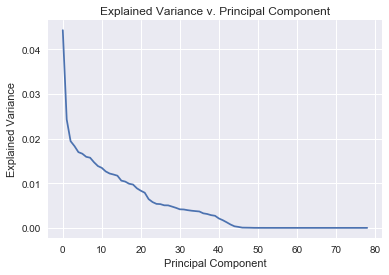

----Explained Variance for Top 5 Principal Components----
PC1 explained variance: 0.2860....
PC2 explained variance: 0.0443....
PC3 explained variance: 0.0243....
PC4 explained variance: 0.0194....
PC5 explained variance: 0.0183....


In [8]:
# Plotting the explained variance for all 80 components, discluding pc1
sns.set()
plt.plot(pca.explained_variance_[1:])
plt.title('Explained Variance v. Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

print('----Explained Variance for Top 5 Principal Components----')
print(f'PC1 explained variance: {pca.explained_variance_[0]:0.4f}....')
print(f'PC2 explained variance: {pca.explained_variance_[1]:0.4f}....')
print(f'PC3 explained variance: {pca.explained_variance_[2]:0.4f}....')
print(f'PC4 explained variance: {pca.explained_variance_[3]:0.4f}....')
print(f'PC5 explained variance: {pca.explained_variance_[4]:0.4f}....')

#### 5. PCR - Linear regression with the principal components.
#### 5.A Choosing subset of principal components for PCR

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     471.1
Date:                Sat, 23 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:48:33   Log-Likelihood:                -5518.7
No. Observations:                5875   AIC:                         1.108e+04
Df Residuals:                    5854   BIC:                         1.122e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.008  -5.41e-13      1.0

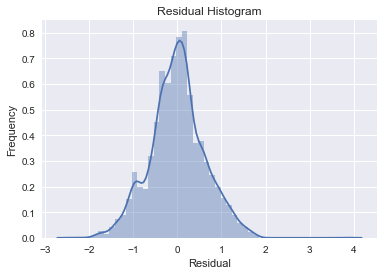

In [9]:
# Creating linear regression formula for 20 principal components
n = 20
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

# Creating pcr model using formula and pca DataFrame
pcr_model = sm.ols(formula = formula_final, data=pca_df)

# Fitting model
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plotting histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

For PCR, 20 of 80 principal components were used in the regression formula. These were chosen based on the degree to which they explained variance in the dependent variable 'total_UPDRS', a metric for assessing the likelihood of a patient having Parkinson's. Within the regression result, Adjusted R-squared is reported as 0.615, representing the proportion of variation in total_UPDRS that can be explained by the 20 selected priniciple components; additionally, unlike R-squared's value, Adj R-squared's value controls for the number of independent variables present.

#### 5.B Number of Principal Components v. AIC, BIC, LLF, and RSquaredAdj statistics

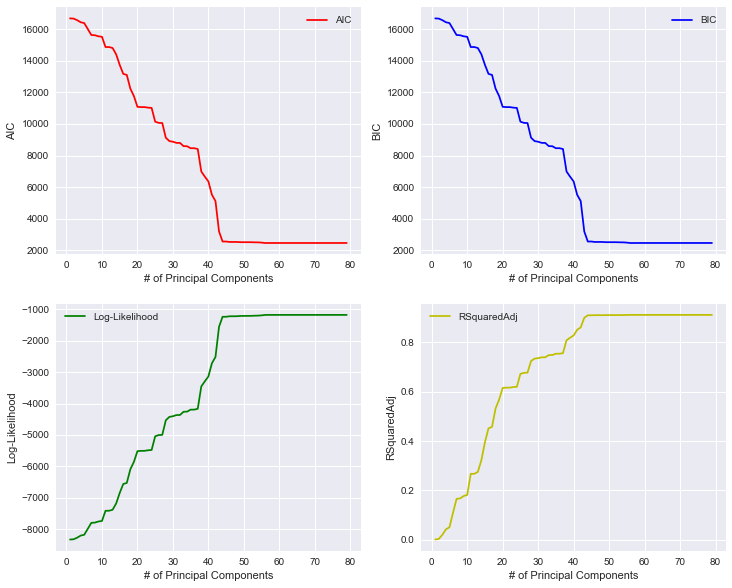

In [10]:
# Obtaining AIC, BIC, LogLikelihood, & RSquaredAdj for pcr's with 1 to 80 principal components
AICs = []
BICs = []
RSquaredAdjs = []
Loglikelihoods = []
for n in range(1, len(pca_df.columns) - 1):
    formula_start = target_label + ' ~ '
    formula_terms = ['pc' + str(x+1) for x in range(n)]
    formula_end = ' + '.join(formula_terms)
    formula_final = formula_start + formula_end
    
    pcr_model = sm.ols(formula = formula_final, data=pca_df)
    results = pcr_model.fit()
    AICs.append(results.aic) # AIC
    RSquaredAdjs.append(results.rsquared_adj) # RSquaredAdj
    Loglikelihoods.append(results.llf)
    BICs.append(results.bic)
    
# Plotting AIC and RSquaredAdj pairs
plt.figure(figsize=(12, 10)).gca()

plt.subplot(221)
plt.plot(range(1, len(pca_df.columns) - 1), AICs, color='r', label='AIC')
plt.ylabel('AIC')
plt.xlabel('# of Principal Components')
plt.legend()

plt.subplot(222)
plt.plot(range(1, len(pca_df.columns) - 1), AICs, color='b', label='BIC')
plt.ylabel('BIC')
plt.xlabel('# of Principal Components')
plt.legend()

plt.subplot(223)
plt.plot(range(1, len(pca_df.columns) - 1), Loglikelihoods, color='g', label='Log-Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('# of Principal Components')
plt.legend()

plt.subplot(224)
plt.plot(range(1, len(pca_df.columns) - 1), RSquaredAdjs, color='y', label='RSquaredAdj')
plt.ylabel('RSquaredAdj')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

AIC, BIC, LLF, & RSquared Adj statistics plotted against the number of Principal Components used within the regression model's formula. 

Lower AIC and BIC criterion represent a better model, relatively speaking. While both AIC and BIC statistics penalize based on the number of components, they are both shown to be decreasing as one includes additional components. This discrepancy can be explained by behavior of the Log-likelihood function, which rapidly increases as one continues to add components. As expected, RSquaredAdj increases as the number of principal components increases, though its value plateaus by the addition of the 43rd component.

#### 5.C Exploring the relationships between Principal Components and Features

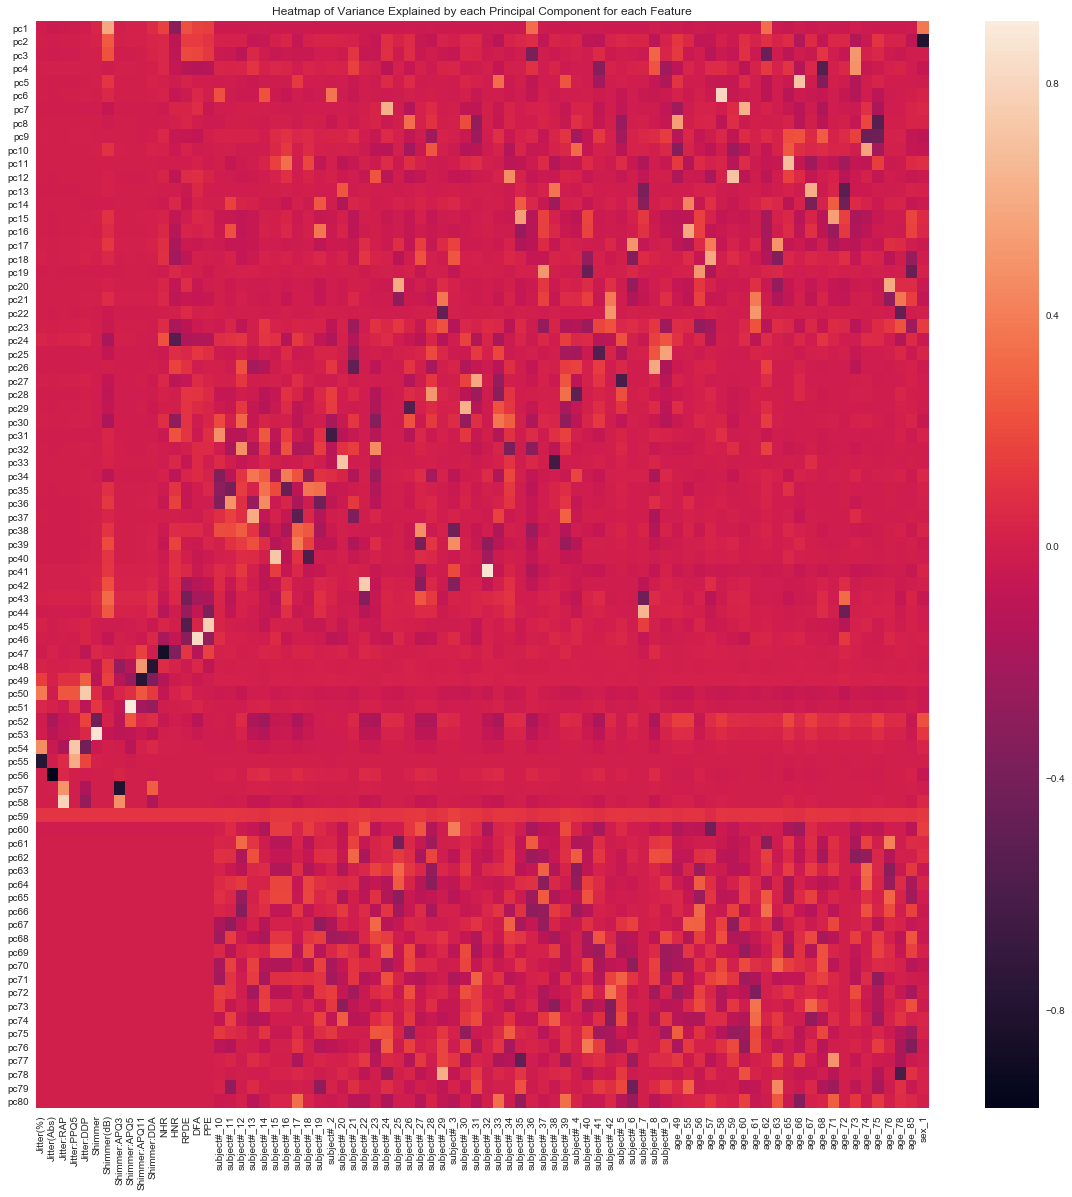

In [11]:
# Creating Heatmap from pca.components
plt.figure(figsize=(20, 20))
sns.heatmap(data=pca.components_, xticklabels=feature_labels, yticklabels=pca_df.columns[:-1])
plt.title('Heatmap of Variance Explained by each Principal Component for each Feature')
plt.show()

A heatmap of variance explained by each principal component for each feature.

This visualization provides a quick reference to how prinicpal components relate to particular features. For example, pc1 partially explains variation within Shimmer(dB), NHR, RPDE, subject\#_36, age62, and sex_1 features. 